## **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
os.chdir('/content/drive/MyDrive/IU Material/Data Mining/Group J - Project DM')
sys.path.append("/content/drive/MyDrive/IU Material/Data Mining/Group J - Project DM")
!pwd

/content/drive/MyDrive/IU Material/Data Mining/Group J - Project DM


## **Process data of sellers**

In [ ]:
data = pd.read_csv("./Dataset/computed_insight_success_of_active_sellers.csv")

In [ ]:
data.shape

(958, 13)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

merchantid                   0
listedproducts               0
totalunitssold               0
meanunitssoldperproduct      0
rating                       0
merchantratingscount         0
meanproductprices            0
meanretailprices             0
averagediscount              0
meandiscount                 0
meanproductratingscount      0
totalurgencycount          567
urgencytextrate            567
dtype: int64

In [ ]:
data.drop(columns=['urgencytextrate','totalurgencycount'],inplace=True)

In [ ]:
data.shape

(958, 11)

In [ ]:
data.to_csv("./Dataset/sellers.csv",index=False)

In [ ]:
data = pd.read_csv("./Dataset/products.csv")

In [ ]:
data.shape

(1573, 43)

## **Study Question**

Sales Volume Prediction and Factors Affecting Sales Volume

## **Import**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score,\
# f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.tree import plot_tree

# # For saving models
# import pickle

In [ ]:
data = pd.read_csv('./Dataset/products.csv')
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

## **Explore Data**

In [ ]:
data.shape

(1573, 43)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


### **Duplicates**

In [ ]:
data.duplicated().sum()

34

In [ ]:
data['product_id'].duplicated().sum()

232

Remove all duplicated `product_id`.

In [ ]:
data = data.drop_duplicates(subset='product_id', keep='first')
data.shape

(1341, 43)

In [ ]:
data.duplicated().sum()

0

### **Missing values**

In [ ]:
data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 35
rating_four_count                 35
rating_three_count                35
rating_two_count                  35
rating_one_count                  35
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
data.loc[data['rating_count']==0, ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']].isna()

,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,True,True,True,True,True
112,True,True,True,True,True
126,True,True,True,True,True
189,True,True,True,True,True
216,True,True,True,True,True
248,True,True,True,True,True
309,True,True,True,True,True
346,True,True,True,True,True
348,True,True,True,True,True
375,True,True,True,True,True


35 `rating_count`values is equal to 0, which means that `rating_num_count` (for num = {5,4,3,2,1}) is equal to NaN. If there is no rating for a product, CANNOT COUNT!

So, replace those missing values to 0.

In [ ]:
data['rating_five_count'].fillna(0, inplace=True)
data['rating_four_count'].fillna(0, inplace=True)
data['rating_three_count'].fillna(0, inplace=True)
data['rating_two_count'].fillna(0, inplace=True)
data['rating_one_count'].fillna(0, inplace=True)

In [ ]:
data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

`product_color`, `product_variation_size_id`, `origin_country`, `merchant_name`, and `merchant_info_subtitle` contain missing values. However, the total of them accounts for ~5% of the whole dataset. They can be removed.

In [ ]:
# remove missing values
data.dropna(subset=['product_color', 'product_variation_size_id', 'origin_country', 'merchant_name', 'merchant_info_subtitle'], inplace=True)
data.shape

(1274, 43)

In [ ]:
data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

- Missing values of `has_urgency_banner` will be replaced by 0.

- All values of `urgency_text` are 'Quantité limitée !' or NaN. It can be dropped as `has_urgency_banner` can represent it.

- `merchant_profile_picture` contains URL of merchants' profile pictures. However, most of them are NaN. So, it should be dropped.

In [ ]:
data['has_urgency_banner'] = data['has_urgency_banner'].replace(np.nan,0)

In [ ]:
data.drop(columns=['urgency_text','merchant_profile_picture'],inplace=True)
data.shape

(1274, 41)

In [ ]:
data.isna().sum()

title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_title

### **Unnecessary columns**

In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1572
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1274 non-null   object 
 1   title_orig                    1274 non-null   object 
 2   price                         1274 non-null   float64
 3   retail_price                  1274 non-null   int64  
 4   currency_buyer                1274 non-null   object 
 5   units_sold                    1274 non-null   int64  
 6   uses_ad_boosts                1274 non-null   int64  
 7   rating                        1274 non-null   float64
 8   rating_count                  1274 non-null   int64  
 9   rating_five_count             1274 non-null   float64
 10  rating_four_count             1274 non-null   float64
 11  rating_three_count            1274 non-null   float64
 12  rating_two_count              1274 non-null   float64
 13  rating_o

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

['title',
 'title_orig',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [ ]:
df.drop(columns=['title','currency_buyer','merchant_name','product_url',
 'product_picture','theme',
 'crawl_month'],inplace=True)

In [ ]:
df.to_csv("./Dataset/cleaned_products.csv", index=False)

In [ ]:
df.shape

(1274, 34)

#### **Representive attributes**

Some variables of type `object` are represented to products or merchants. They do not contribute to sale volume prediction. So, they should be removed.

In [ ]:
df.drop(columns=['title', 'title_orig', 'currency_buyer',
       'tags', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id',
       'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month'],inplace=True)

In [ ]:
df.shape

(1274, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1274 non-null   float64
 1   retail_price                  1274 non-null   int64  
 2   units_sold                    1274 non-null   int64  
 3   uses_ad_boosts                1274 non-null   int64  
 4   rating                        1274 non-null   float64
 5   rating_count                  1274 non-null   int64  
 6   rating_five_count             1274 non-null   float64
 7   rating_four_count             1274 non-null   float64
 8   rating_three_count            1274 non-null   float64
 9   rating_two_count              1274 non-null   float64
 10  rating_one_count              1274 non-null   float64
 11  badges_count                  1274 non-null   int64  
 12  badge_local_product           1274 non-null   int64  
 13  badge_pr

#### **Columns with one unique values**

In [ ]:
for col_name in df.columns:
    if df[col_name].value_counts().shape == (1,):
        print(col_name)

No column with only one unique value.

#### **Columns with very few value counts in other indices** (less than 5 indices)

In [ ]:
for col_name in df.columns:
    if (df[col_name].value_counts().shape[0] < 5) and ((df[col_name].value_counts().iloc[0] - df[col_name].value_counts().iloc[1]) > 1200):
        print(col_name)

badge_local_product
badge_fast_shipping
shipping_is_express


In [ ]:
df['badge_local_product'].value_counts()

badge_local_product
0    1251
1      23
Name: count, dtype: int64

In [ ]:
df['badge_fast_shipping'].value_counts()

badge_fast_shipping
0    1258
1      16
Name: count, dtype: int64

In [ ]:
df['shipping_is_express'].value_counts()

shipping_is_express
0    1272
1       2
Name: count, dtype: int64

These three variables are imbalanced distribution, which may not perform well or contribute much to the predictive model.

So, they should be dropped out.

In [ ]:
df.drop(columns=['badge_local_product','badge_fast_shipping','shipping_is_express'], inplace=True)

In [ ]:
df.shape

(1274, 25)

### **Convert `object` type columns to `numeric`**

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

['product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country']

In [ ]:
df['product_color'].value_counts()

product_color
black                 258
white                 199
pink                   84
blue                   83
yellow                 79
                     ... 
black & stripe          1
Rose red                1
greysnakeskinprint      1
applegreen              1
gold                    1
Name: count, Length: 99, dtype: int64

In [ ]:
df['product_variation_size_id'].value_counts()

product_variation_size_id
S         538
XS        286
M         171
XXS        72
L          44
         ... 
20pcs       1
US-S        1
X   L       1
25          1
SIZE S      1
Name: count, Length: 91, dtype: int64

In [ ]:
df['shipping_option_name'].value_counts()

shipping_option_name
Livraison standard         1221
Standard Shipping            17
Envio Padrão                  8
Envío normal                  4
Expediere Standard            4
Standardversand               3
Standardowa wysyłka           3
الشحن القياسي                 3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Livraison Express             2
Стандартная доставка          2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: count, dtype: int64

In [ ]:
df['origin_country'].value_counts()

origin_country
CN    1242
US      26
VE       3
SG       2
GB       1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the mentioned columns
columns_to_encode = ['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country']

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    unique_values = df[column].unique()
    encoded_values = label_encoder.fit_transform(df[column])
    mapping_df = pd.DataFrame({column: df[column], 'Encoded_Value': encoded_values})
    globals()[f"mapping_df_{column}"] = mapping_df
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df[['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country']].head()

,product_color,product_variation_size_id,shipping_option_name,origin_country
0,88,40,4,0
1,39,77,4,0
2,47,77,4,0
3,13,40,4,0
4,98,44,4,0


In [ ]:
mapping_df_product_color.head()

,product_color,Encoded_Value
0,white,88
1,green,39
2,leopardprint,47
3,black,13
4,yellow,98


In [ ]:
df.shape

(1274, 25)

In [ ]:
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_product_quality', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

## **Analyze Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = df.copy()

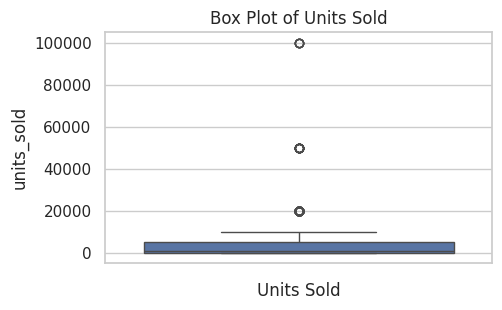

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(dt['units_sold'])
plt.title('Box Plot of Units Sold')
plt.xlabel('Units Sold')
plt.show()

In [ ]:
def remove_outliers(dt, column):
    q1 = dt[column].quantile(0.25)
    q3 = dt[column].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr

    # Drop rows with outliers
    filtered_dt = dt[(df[column] >= lower_bound) & (dt[column] <= upper_bound)]

    return filtered_dt

In [ ]:
filtered_dt = remove_outliers(dt, 'units_sold')

In [ ]:
filtered_dt.shape

(1162, 25)

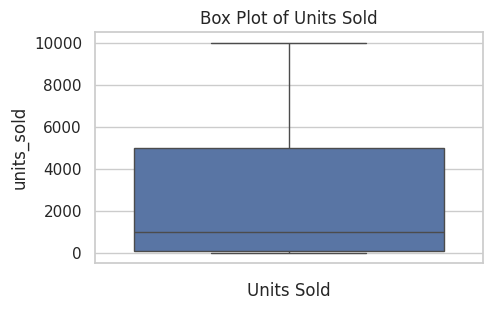

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(filtered_dt['units_sold'])
plt.title('Box Plot of Units Sold')
plt.xlabel('Units Sold')
plt.show()

In [ ]:
# Define categories using quantiles
threshold = filtered_dt['units_sold'].quantile(0.5)

def categorize_sales(volume):
    if volume <= threshold:
        return 'Low'
    else:
        return 'High'

filtered_dt['sales_status'] = filtered_dt['units_sold'].apply(categorize_sales)

In [ ]:
filtered_dt['sales_status'].value_counts()

sales_status
Low     812
High    350
Name: count, dtype: int64

In [ ]:
filtered_dt['sales_status'] = filtered_dt['sales_status'].apply(lambda x: 1 if x == 'High' else 0)

<ipython-input-147-ab304743c678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dt['sales_status'] = filtered_dt['sales_status'].apply(lambda x: 1 if x == 'High' else 0)


In [ ]:
filtered_dt['sales_status'].value_counts()

sales_status
0    812
1    350
Name: count, dtype: int64

In [ ]:
filtered_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1572
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1162 non-null   float64
 1   retail_price                  1162 non-null   int64  
 2   units_sold                    1162 non-null   int64  
 3   uses_ad_boosts                1162 non-null   int64  
 4   rating                        1162 non-null   float64
 5   rating_count                  1162 non-null   int64  
 6   rating_five_count             1162 non-null   float64
 7   rating_four_count             1162 non-null   float64
 8   rating_three_count            1162 non-null   float64
 9   rating_two_count              1162 non-null   float64
 10  rating_one_count              1162 non-null   float64
 11  badges_count                  1162 non-null   int64  
 12  badge_product_quality         1162 non-null   int64  
 13  product_

#### **Correlation & Colinearity**

In [ ]:
dt = filtered_dt.copy()
dt.shape

(1162, 26)

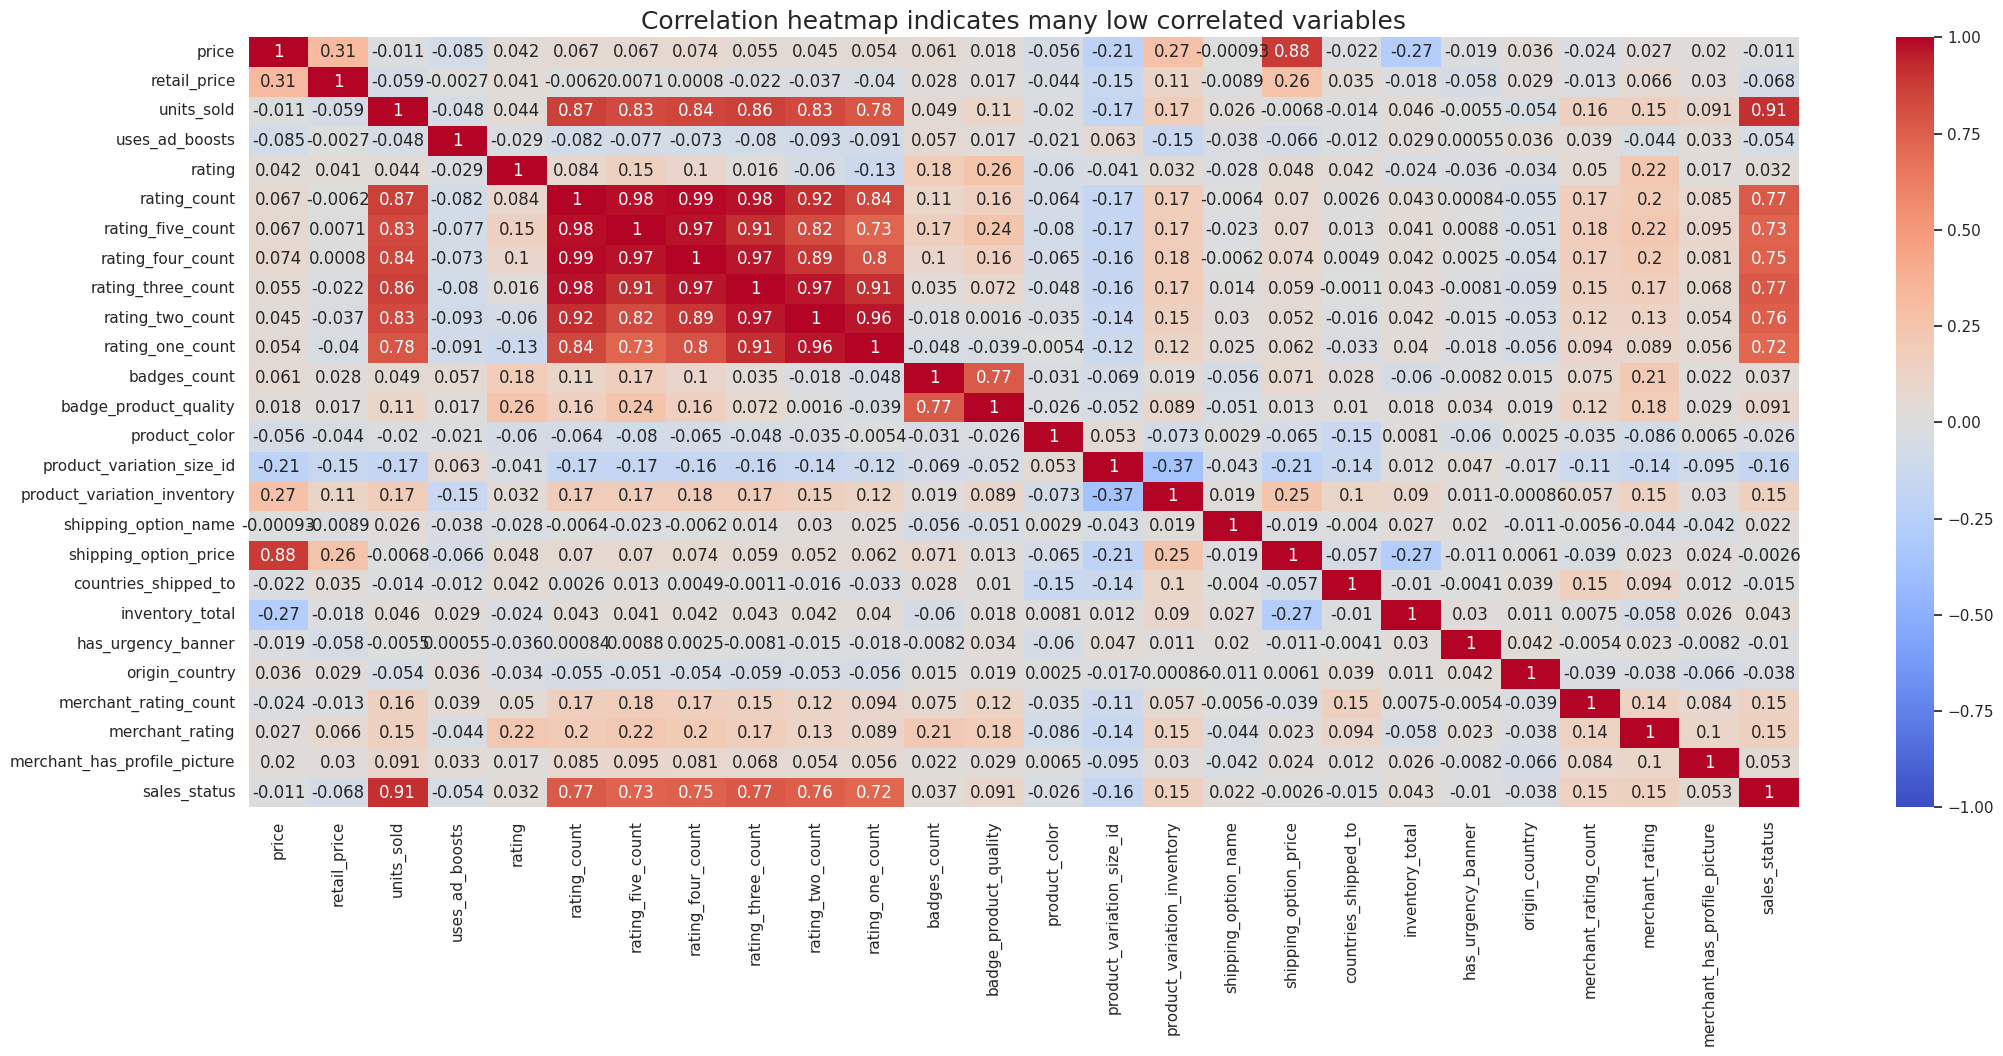

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(25,10))
sns.heatmap(dt.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

1. **High Correlation with Target Variable (units_sold):**

Variables with high correlation with units_sold are generally useful for prediction. These include:

`rating_count` (0.89)

`rating_five_count` (0.84)

`rating_four_count` (0.84)

`rating_three_count` (0.87)

`rating_two_count` (0.95)

`rating_one_count` (0.91)

**2. Multicollinearity:**

Among these, rating_count is highly correlated with all other rating variables. To avoid multicollinearity, only `rating_count1 should be kept and drop the rest of the rating variables.

**3. Weak or No Correlation:**

Variables with weak or no correlation with `units_sold` can be considered for removal. These include:

`inventory_total` (0.00097)

`origin_country` (0.005)

`merchant_has_profile_picture` (-0.005)

**4. Redundant Features:**

`shipping_option_price` has a very high correlation with `price` (0.88). And the correlation between `badge_count` and `badge_product_quality` is also high (0.79).  So, keep `price` and `badge_count`, and drop `shipping_option_price` and `badge_product_quality`.

**Hence:**

- Drop highly correlated rating features, except rating_count: rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count.

- Drop features with weak correlation with units_sold: product_color, product_variation_size_id, shipping_option_name, origin_country, merchant_has_profile_picture.

- Drop redundant feature: shipping_option_price, badge_product_quality.

In [ ]:
dt.drop(columns=[ 'rating_five_count', 'rating_four_count', 'rating_three_count',
    'rating_two_count', 'rating_one_count', 'shipping_option_price', 'badge_product_quality',
    'inventory_total', 'origin_country', 'merchant_has_profile_picture'],inplace=True)

In [ ]:
dt.shape

(1162, 16)

In [ ]:
dt.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,countries_shipped_to,has_urgency_banner,merchant_rating_count,merchant_rating,sales_status
0,16.00,14,100,0,3.76,54,0,88,40,50,4,34,1.0,568,4.128521,0
2,8.00,43,100,0,3.57,14,0,47,77,1,4,36,1.0,295,3.989831,0
3,8.00,8,5000,1,4.03,579,0,13,40,50,4,41,0.0,23832,4.020435,1
4,2.72,3,100,1,3.10,20,0,98,44,1,4,35,1.0,14482,4.001588,0
5,3.92,9,10,0,5.00,1,0,62,64,1,4,40,0.0,65,3.507692,0


In [ ]:
dt.to_csv('./Dataset/dt_classify.csv', index=False)

In [ ]:
df = dt.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1162 non-null   float64
 1   retail_price                 1162 non-null   int64  
 2   units_sold                   1162 non-null   int64  
 3   uses_ad_boosts               1162 non-null   int64  
 4   rating                       1162 non-null   float64
 5   rating_count                 1162 non-null   int64  
 6   badges_count                 1162 non-null   int64  
 7   product_color                1162 non-null   int64  
 8   product_variation_size_id    1162 non-null   int64  
 9   product_variation_inventory  1162 non-null   int64  
 10  shipping_option_name         1162 non-null   int64  
 11  countries_shipped_to         1162 non-null   int64  
 12  has_urgency_banner           1162 non-null   float64
 13  merchant_rating_co

#### **Influence of price on sales volume**

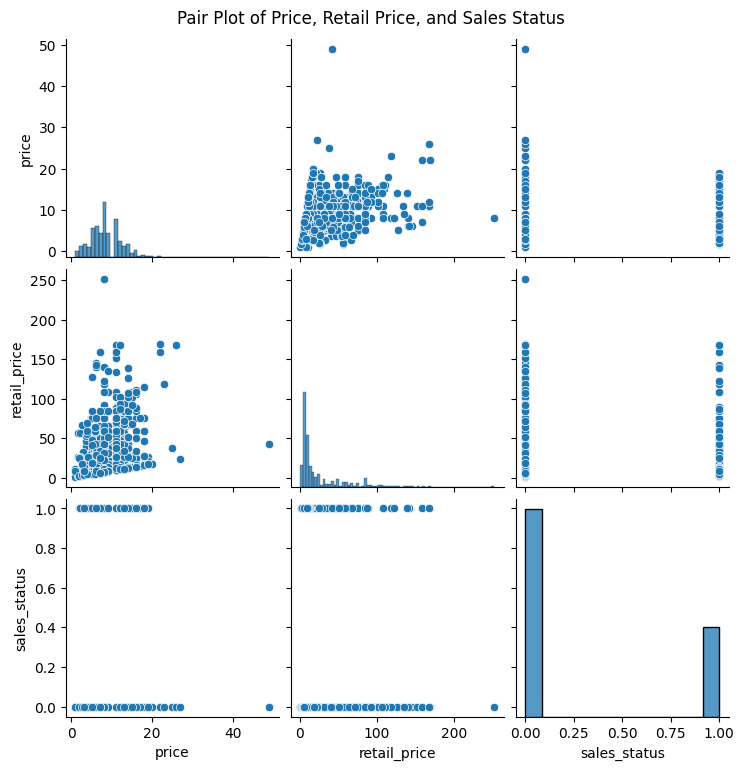

In [ ]:
relevant_cols = df[['price', 'retail_price', 'sales_status']]

# Creating the pair plot
sns.pairplot(relevant_cols)
plt.suptitle('Pair Plot of Price, Retail Price, and Sales Status', y=1.02)
plt.show()

- The distributions of price and retail_price show that most products are priced between 0 to 50, with a peak around 30.

- The units_sold distribution is heavily right-skewed, indicating that most products sell relatively low units, with a few high-selling outliers.

- The scatterplots between price/units_sold and retail_price/units_sold show a roughly triangular pattern, suggesting that higher prices/retail prices do not necessarily translate to higher units sold. However, there is a lower bound, where products with very low prices tend to have low units sold.

- There are some very high-selling outliers (units_sold > 80,000) across a wide range of prices and retail prices, implying that factors other than just pricing play a significant role in determining sales volume.

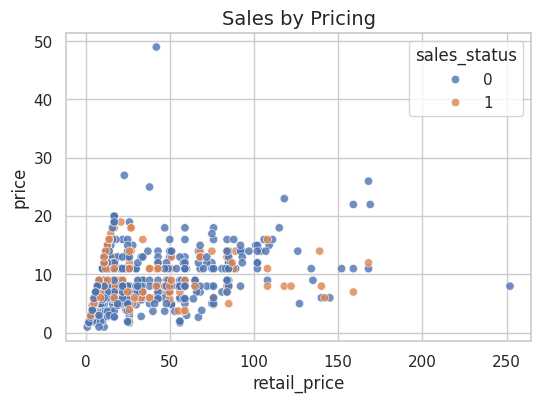

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, y='price', x='retail_price', hue='sales_status', alpha=0.8)
# plt.legend(labels=['high', 'low'])
plt.title('Sales by Pricing', fontsize='14');

#### **Does discount affect sales volume?**

Create new variable `discount_percentage`: The percentage of the amount of price that products are reduced over their retail price.

In [ ]:
df['discount_percentage'] = round(((1-(df['price']/df['retail_price']))*100),2)
df['discount_percentage'].value_counts()

discount_percentage
 0.00     132
-14.29    122
-10.00     74
-16.67     66
-12.50     50
         ... 
 68.75      1
 80.70      1
 60.61      1
 81.33      1
 73.68      1
Name: count, Length: 402, dtype: int64

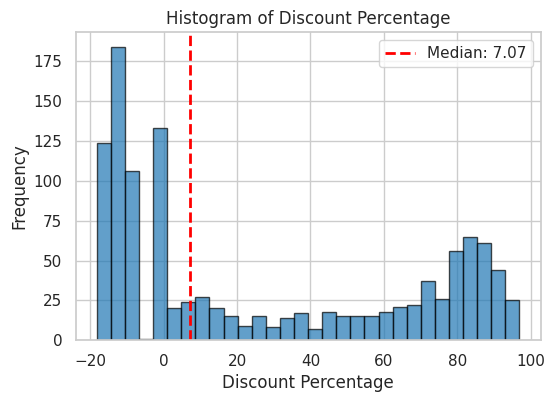

In [ ]:
median_discount_percentage = df['discount_percentage'].median()

plt.figure(figsize=(6, 4))
plt.hist(df['discount_percentage'], bins=30, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.axvline(median_discount_percentage, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_discount_percentage:.2f}')

plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Percentage')
plt.legend()
plt.show()

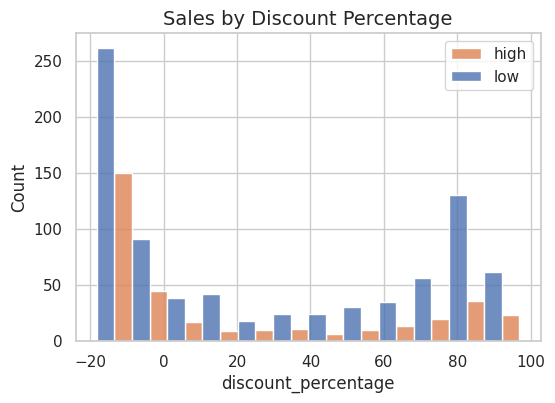

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='discount_percentage', hue='sales_status', multiple='dodge', alpha=0.8)
plt.legend(labels=['high', 'low'])
plt.title('Sales by Discount Percentage', fontsize='14');

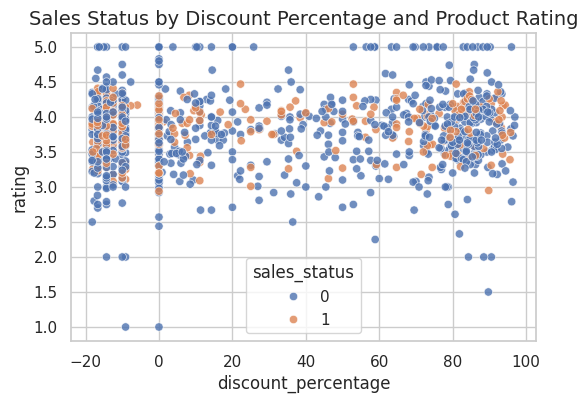

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, y='rating', x='discount_percentage', hue='sales_status', alpha=0.8)
# plt.legend(labels=['high', 'low'])
plt.title('Sales Status by Discount Percentage and Product Rating', fontsize='14');

In [ ]:
df[['discount_percentage', 'sales_status']].corr().iloc[0, 1]

-0.10846514673718709

In [ ]:
df['has_discount'] = np.where(df['discount_percentage'] > 0, 1, 0)

In [ ]:
df.groupby('has_discount')['sales_status'].describe()

,count,mean,std,min,25%,50%,75%,max
has_discount,,,,,,,,
0,547.0,0.356490,0.479401,0.0,0.0,0.0,1.0,1.0
1,615.0,0.252033,0.434533,0.0,0.0,0.0,1.0,1.0


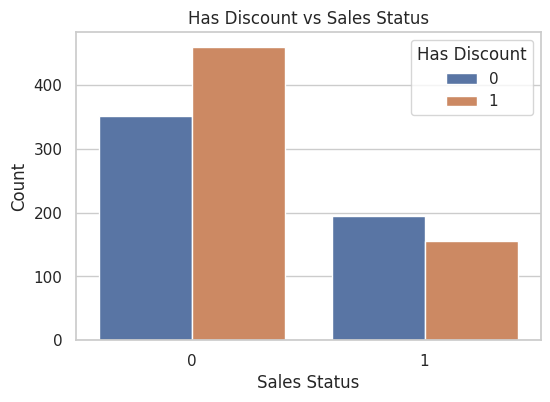

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sales_status', hue='has_discount', palette='deep')

plt.title('Has Discount vs Sales Status')
plt.xlabel('Sales Status')
plt.ylabel('Count')

plt.legend(title='Has Discount', loc='upper right')
plt.show()

In [ ]:
df[['has_discount', 'sales_status']].corr().iloc[0, 1]

-0.11364713696388273

#### **Rating Analysis**
Examining how product and merchant ratings influence sales.

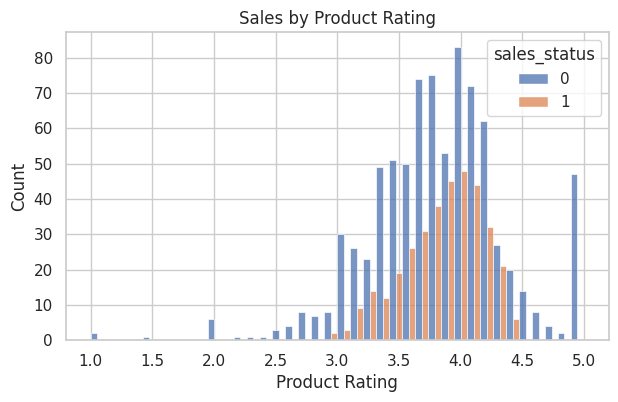

In [ ]:
# Scatter plot of product rating vs units sold
plt.figure(figsize=(7,4))
sns.histplot(x='rating', hue='sales_status', multiple='dodge', data=df)
plt.title('Sales by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Count')
plt.show()

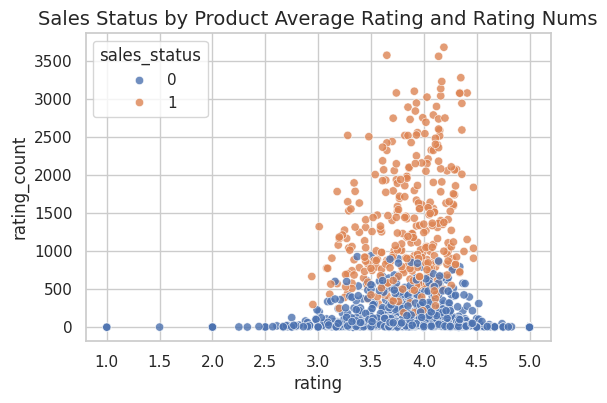

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='rating', y='rating_count', hue='sales_status', alpha=0.8)
# plt.legend(labels=['high', 'low'])
plt.title('Sales Status by Product Average Rating and Rating Nums', fontsize='14');

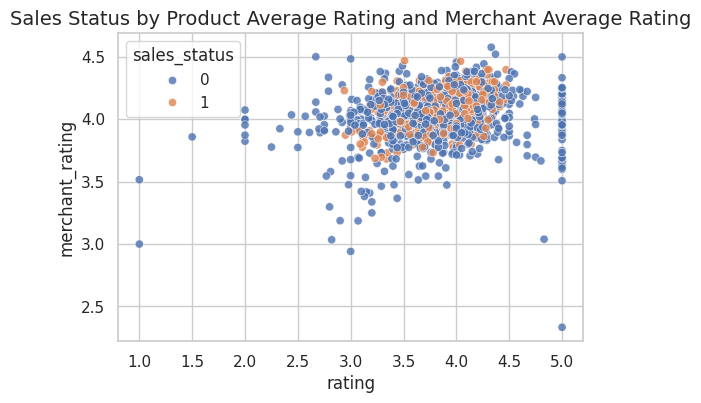

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='rating', y='merchant_rating', hue='sales_status', alpha=0.8)
# plt.legend(labels=['high', 'low'])
plt.title('Sales Status by Product Average Rating and Merchant Average Rating', fontsize='14');

                 sales_status    rating  merchant_rating
sales_status         1.000000  0.031924         0.148496
rating               0.031924  1.000000         0.220186
merchant_rating      0.148496  0.220186         1.000000


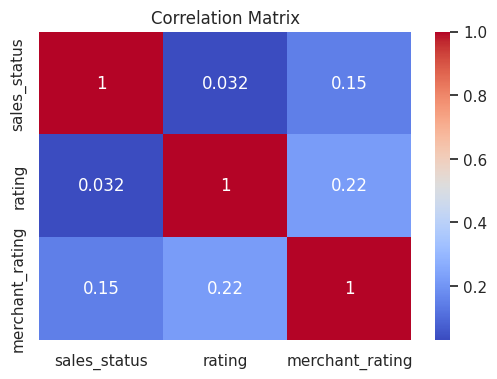

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['sales_status', 'rating', 'merchant_rating']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the independent variables (including a constant for the intercept)
X = df[['rating', 'merchant_rating']]
X = sm.add_constant(X)
# Define the dependent variable
y = df['sales_status']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_status   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     13.07
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.44e-06
Time:                        17:06:25   Log-Likelihood:                -730.44
No. Observations:                1162   AIC:                             1467.
Df Residuals:                    1159   BIC:                             1482.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0525      0.269     

**Scatter Plots**

**1. Product Rating vs Units Sold**
- The scatter plot shows that units sold generally increase with product ratings up to a certain point.
- There are some products with high units sold and mid-range ratings (around 3.5 to 4.0), indicating that high sales can be achieved even without the highest ratings.
- Few products with low ratings still have high units sold, which might be due to other factors like price or marketing.

**2. Merchant Rating vs Units Sold**
- The scatter plot indicates a similar trend to product ratings: units sold tend to be higher with better merchant ratings.
- There is a concentration of high sales for merchant ratings around 4.0.
- Some merchants with relatively lower ratings (around 3.0) still achieve high sales, suggesting that other factors might influence sales positively.

**Correlation Matrix**

**3. Correlation Analysis**
- The correlation between `units_sold` and `rating` is 0.047, indicating a very weak positive correlation.
- The correlation between `units_sold` and `merchant_rating` is 0.12, which is also weak but slightly stronger than the correlation with product ratings.
- The correlation between `rating` and `merchant_rating` is 0.23, showing a somewhat moderate relationship between the two.

**Regression Analysis**

**4. Regression Results**
- **R-squared**: The R-squared value is 0.015, indicating that only 1.5% of the variance in units sold can be explained by the model (product rating and merchant rating). This suggests that other factors not included in the model are likely influencing sales.
- **Coefficients**:
  - The coefficient for `rating` is 396.7722, which is positive but not statistically significant (p-value = 0.481).
  - The coefficient for `merchant_rating` is 5539.5503, which is positive and statistically significant (p-value = 0.000). This indicates that an increase in merchant rating is associated with an increase in units sold.
- **P-values**:
  - The p-value for `rating` is 0.481, which is greater than 0.05, indicating that product rating is not a statistically significant predictor of units sold in this model.
  - The p-value for `merchant_rating` is 0.000, indicating that merchant rating is a statistically significant predictor of units sold.

**Summary**

- There is a weak positive correlation between product ratings and units sold, as well as between merchant ratings and units sold.
- The scatter plots suggest that while higher ratings (both product and merchant) are generally associated with higher sales, there are exceptions where lower ratings also result in high sales.
- The regression analysis shows that merchant rating is a statistically significant predictor of units sold, whereas product rating is not significant in this model.
- Overall, other factors not considered in this analysis might have a substantial impact on units sold, and further investigation into these factors would be beneficial.

#### **Impact of Advertisement Boosts**
Evaluating whether the use of advertisement boosts affects the number of units sold.

In [ ]:
print(df.groupby('uses_ad_boosts')['sales_status'].describe())

                count      mean       std  min  25%  50%  75%  max
uses_ad_boosts                                                    
0               653.0  0.323124  0.468028  0.0  0.0  0.0  1.0  1.0
1               509.0  0.273084  0.445982  0.0  0.0  0.0  1.0  1.0


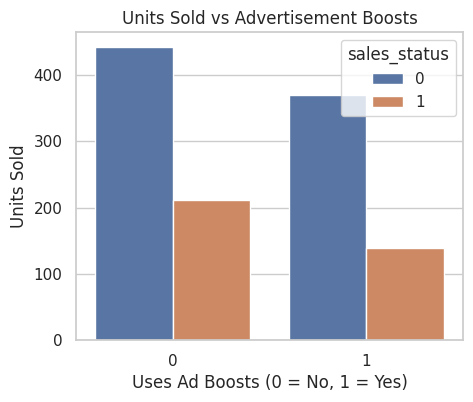

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='uses_ad_boosts', hue='sales_status', data=df)
plt.title('Units Sold vs Advertisement Boosts')
plt.xlabel('Uses Ad Boosts (0 = No, 1 = Yes)')
plt.ylabel('Units Sold')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Split the data into two groups: with and without ad boosts
ad_boost_yes = df[df['uses_ad_boosts'] == 1]['sales_status']
ad_boost_no = df[df['uses_ad_boosts'] == 0]['sales_status']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(ad_boost_yes, ad_boost_no, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -1.85686269672176, P-value: 0.06359436512803301



**Descriptive Statistics**

- **Count**:
  - There are 714 observations where advertisement boosts were not used.
  - There are 560 observations where advertisement boosts were used.
  
- **Mean**:
  - The average number of units sold without advertisement boosts is approximately 4932.61.
  - The average number of units sold with advertisement boosts is approximately 4379.36.
  
- **Standard Deviation**:
  - The standard deviation for units sold without advertisement boosts is approximately 10009.87.
  - The standard deviation for units sold with advertisement boosts is approximately 8815.82.
  
- **Min, 25th Percentile, Median, 75th Percentile, Max**:
  - The minimum, 25th percentile (Q1), median (Q2), 75th percentile (Q3), and maximum values for units sold are similar between the two groups.
  - Both groups have a maximum value of 100,000 units sold, indicating the presence of outliers.

**Box Plot**

- The distribution of units sold is similar for products with and without advertisement boosts.
- Both groups have a median of around 1000 units sold.
- The presence of outliers is evident in both groups, with some products selling significantly more units than the median.
- The interquartile range (IQR) is also similar, suggesting that the overall distribution of sales does not significantly differ with the use of advertisement boosts.

**T-test Results**

- **T-statistic**: -1.047
- **P-value**: 0.295

The p-value of 0.295 is much higher than the common significance level of 0.05. This indicates that there is no statistically significant difference in the average number of units sold between products with and without advertisement boosts. In other words, we do not have enough evidence to suggest that advertisement boosts significantly affect the number of units sold.

**Summary**

- The average number of units sold is slightly higher for products without advertisement boosts compared to those with boosts, but the difference is not large.
- The distributions of units sold for both groups are very similar, with comparable medians, IQRs, and presence of outliers.
- The t-test results show that the difference in means is not statistically significant.

Overall, based on this analysis, advertisement boosts do not appear to have a significant impact on the number of units sold. However, it is important to consider other potential factors and conduct further analysis to confirm these findings.

## **Modeling**

In [ ]:
df = pd.read_csv("./Dataset/dt_classify.csv")
df.shape

(1162, 16)

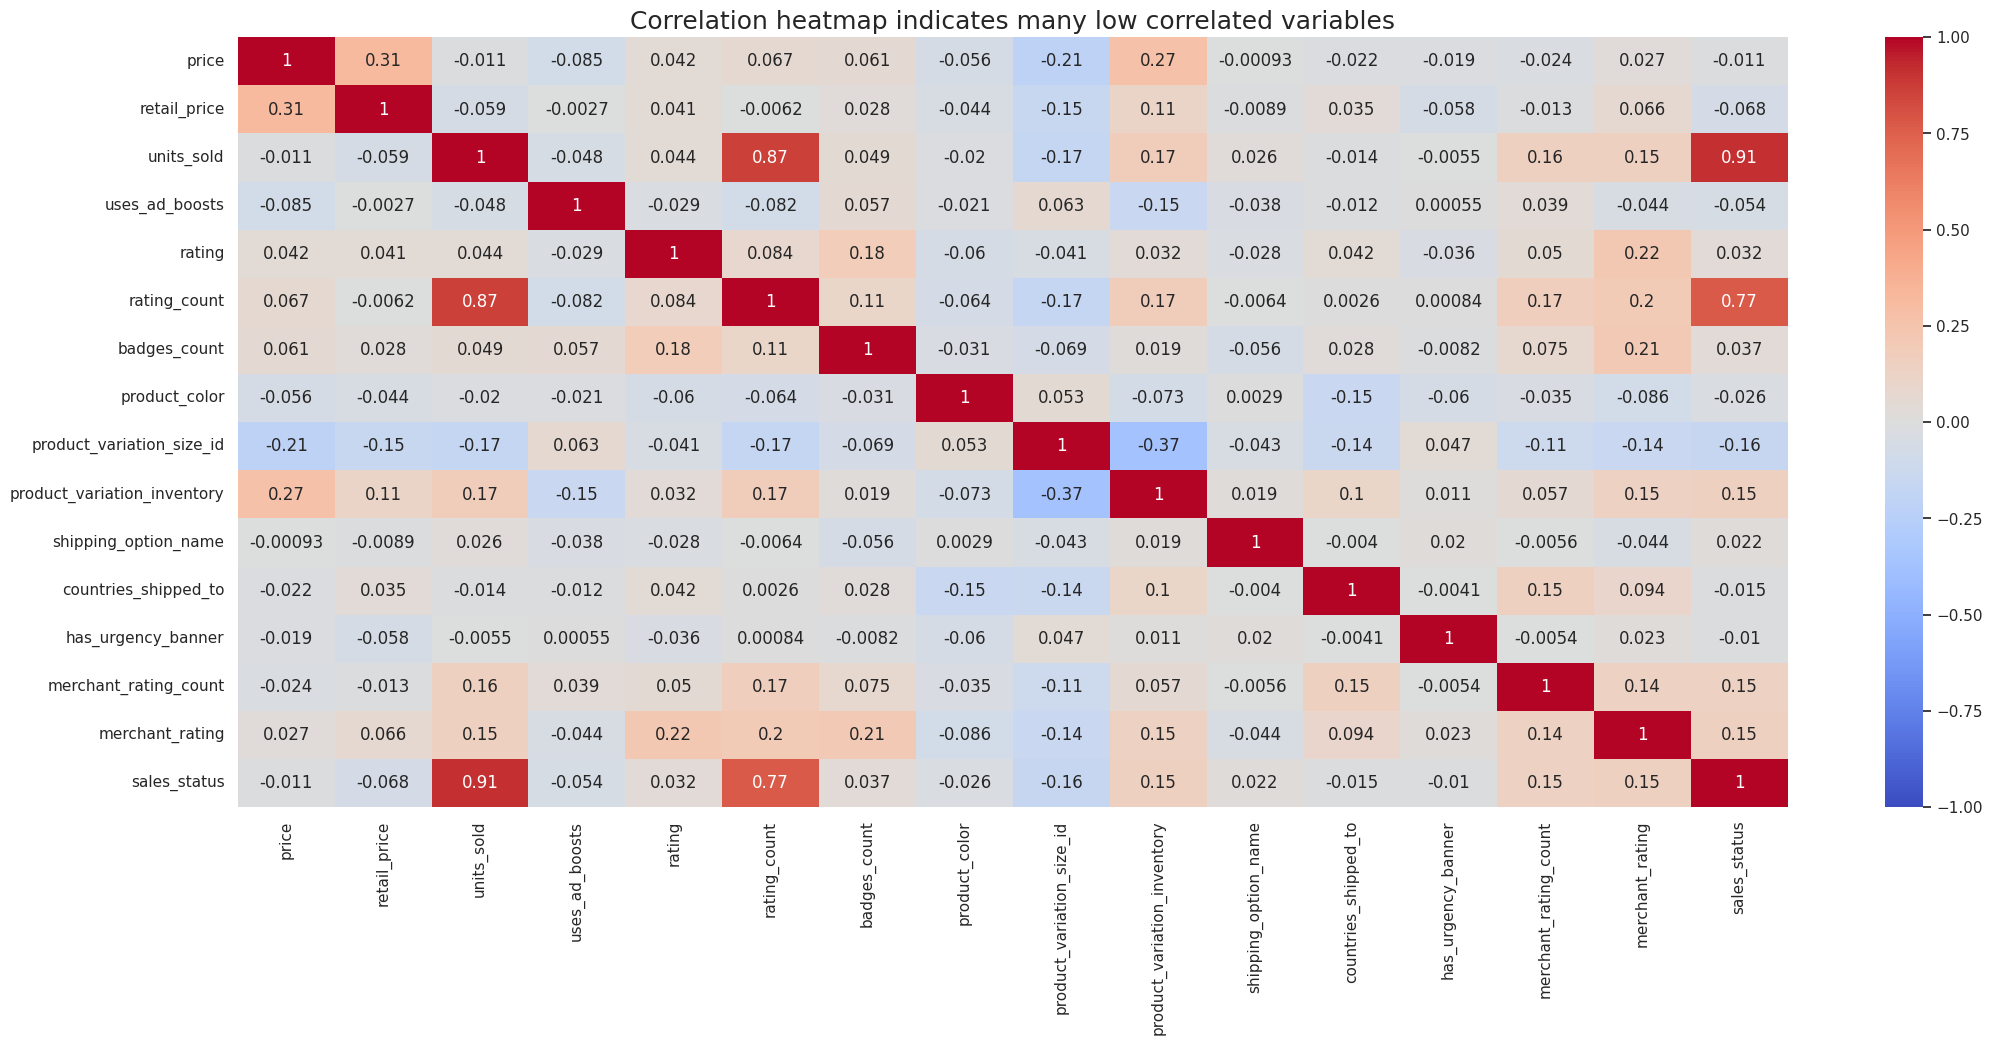

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [ ]:
X = df.drop(columns=['sales_status','units_sold'])
y = df['sales_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### **Logistic Regression**

In [ ]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [ ]:
y_pred = log_clf.predict(X_test)

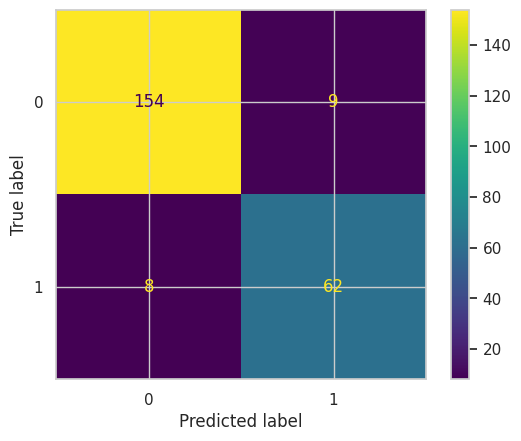

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [ ]:
target_names = ['Predicted Low', 'Predicted High']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 Predicted Low       0.95      0.94      0.95       163
Predicted High       0.87      0.89      0.88        70

      accuracy                           0.93       233
     macro avg       0.91      0.92      0.91       233
  weighted avg       0.93      0.93      0.93       233



### **Tree-based model**

#### **Random Forest**

In [ ]:
# Function to extract all scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [ ]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 32s, sys: 2.12 s, total: 9min 34s
Wall time: 9min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'roc_auc', 'recall', 'f1'})

In [ ]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.910329  0.860714  0.884108  0.932191  0.978545


#### **Decision Tree**

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4 s, sys: 22.4 ms, total: 4.02 s
Wall time: 6.96 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'roc_auc', 'recall', 'f1'})

In [ ]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
print(rf1_cv_results)
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.910329  0.860714  0.884108  0.932191  0.978545
              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.924196  0.817857  0.866915  0.924661  0.965429


### **Extreme Gradient Boosting**

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='roc_auc',
             scoring={'accuracy', 'precision', 'roc_auc', 'recall', 'f1'})

In [ ]:
xgb1_cv_results = make_results('xgboost cv', xgb1, 'auc')
print(rf1_cv_results)
print(tree1_cv_results)
print(xgb1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.910329  0.860714  0.884108  0.932191  0.978545
              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.924196  0.817857  0.866915  0.924661  0.965429
        model  precision    recall        F1  accuracy       auc
0  xgboost cv   0.897488  0.860714  0.878029   0.92789  0.977843
